## OVERVIEW
---
* Data Visualization and Feature Extraction
* Comparisson Between Organic and Conventional Type Avocado
* Normalizing the Data by Using Standard Scaler
* Predictive Modelling Using Machine Learning Models
* Roc Curve Comparison

In [157]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#data viz and manipulation lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pylab as pl

#preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from scipy import interp

#ML models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score

#for results
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, roc_curve, auc

## DATA BASIC INFORMATION
---

In [146]:
#read the data
df = pd.read_csv('avocado.csv')

In [3]:
#check the shape and datatypes of features
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [5]:
#get the columns
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [147]:
#convert date to pandas datetime object
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
#show statistical data for AveragePrice Feature
df.groupby('type')['AveragePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
conventional,9126.0,1.158040,0.263041,0.46,0.98,1.13,1.32,2.22
organic,9123.0,1.653999,0.363502,0.44,1.42,1.63,1.87,3.25


### CHECKING MISSING DATA
---

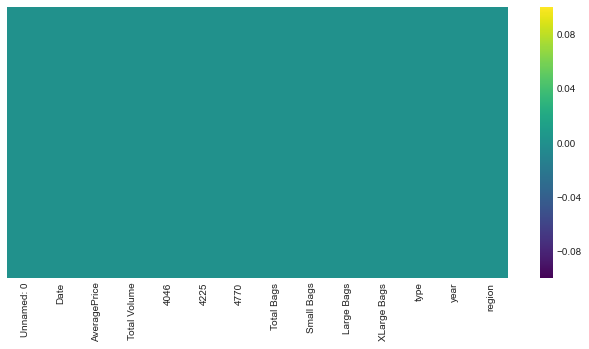

In [17]:
#show heatmap to visualize null data
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False)

In [19]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

* THE DATA IS ALREADY CLEAN, THERE ARE NO NULL VALUES.

### PRICE DISTRIBUTION
---

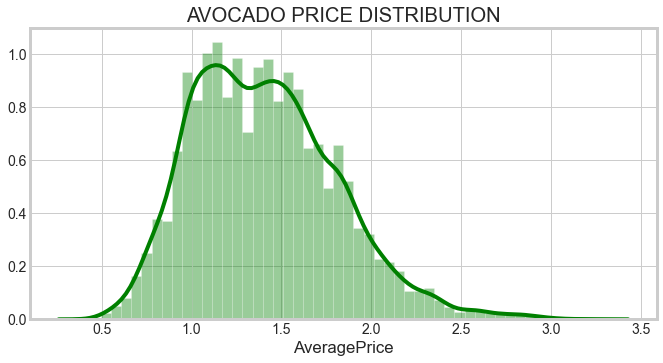

In [23]:
#Show distribution plot
plt.figure(figsize=(10,5))
plt.title('AVOCADO PRICE DISTRIBUTION')
sns.distplot(df.AveragePrice, bins=50,color='green', kde=True)

* #### FROM THE PLOT ABOVE, AS WE CAN SEE MOST OF THE PRICE OF AVOCADOS FALLS BETWEEN 1-1.6$

Text(0.5, 1.0, 'Distplot by Avocado Type')

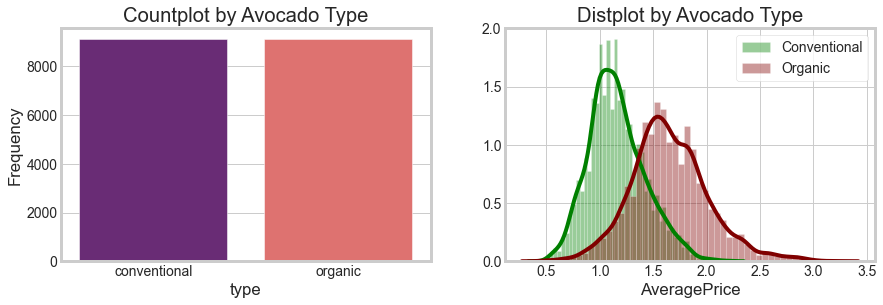

In [50]:
fig, ax = plt.subplots(1,2, figsize=(13,4))

sns.countplot(df.type, ax=ax[0], palette='magma')
sns.distplot(df[df['type'] == 'conventional']['AveragePrice'], ax = ax[1], color='green')
sns.distplot(df[df['type'] == 'organic']['AveragePrice'], ax = ax[1], color='maroon')
ax[1].legend(['Conventional', 'Organic'])

ax[0].set_ylabel('Frequency')
ax[0].set_title('Countplot by Avocado Type')
ax[1].set_title('Distplot by Avocado Type')

* #### THE FREQUENCY PER AVOCADO TYPE IS BALANCED, PREDICTIVE MODEL WON'T HAVE A HARD TIME TRAINING THE DATA.

Text(0.5, 0, 'Type')

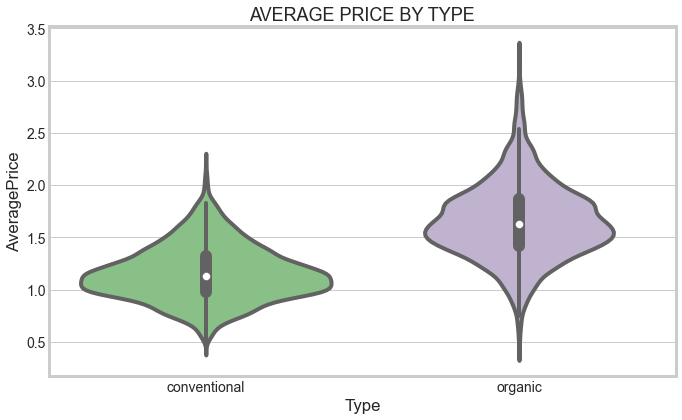

In [62]:
#show comparison by boxplot
plt.figure(figsize=(10,6))
sns.violinplot(x=df.type, y=df.AveragePrice, palette='Accent', )
plt.title('AVERAGE PRICE BY TYPE', fontsize=18)
plt.xlabel('Type')


* #### Organic Avocado's are more expensive than Conventional one, based on the plot above.

### PRICE OF AVOCADO FROM DIFFERENT REGION IN DIFFERENT YEARS.
---

Text(0.5, 1.0, 'PRICE OF ORGANIC AVOCADO FROM DIFFERENT REGION IN DIFFERENT YEARS ')

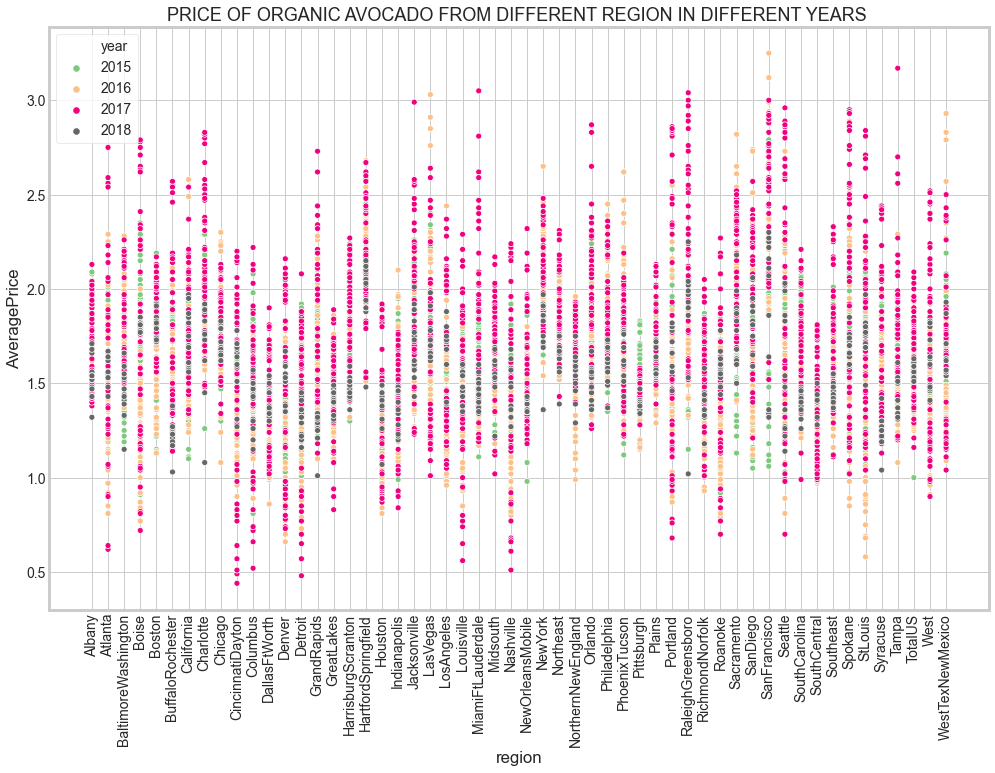

In [88]:
avocado_organic=df[df['type']=='organic']
avocado_conv=df[df['type']=='conventional']

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.scatterplot('region',
               'AveragePrice',
                data=avocado_organic,
                hue='year',
                palette='Accent',
                )
plt.title('PRICE OF ORGANIC AVOCADO FROM DIFFERENT REGION IN DIFFERENT YEARS ', fontsize=18)


* #### Based on the plot above, Organic avocados from year 2017 are very expensive at some region.

Text(0.5, 1.0, 'PRICE OF CONVENTIONAL AVOCADO FROM DIFFERENT REGION IN DIFFERENT YEARS ')

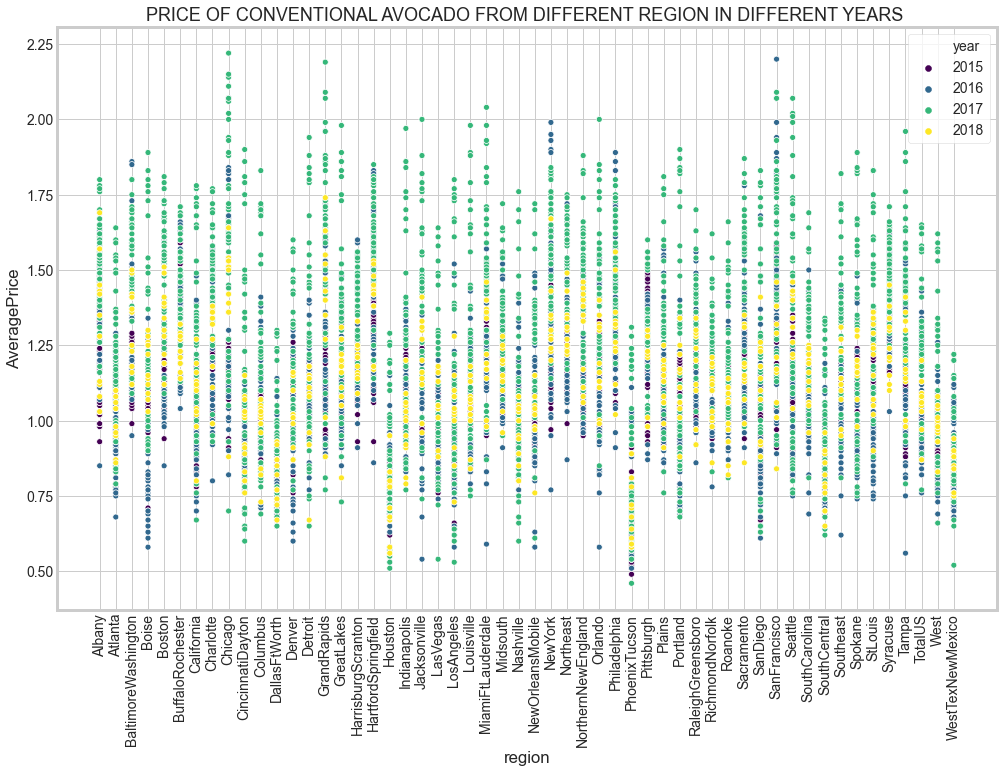

In [98]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.scatterplot('region',
               'AveragePrice',
                data=avocado_conv,
                hue='year',
                palette='viridis',
                )
plt.title('PRICE OF CONVENTIONAL AVOCADO FROM DIFFERENT REGION IN DIFFERENT YEARS ', fontsize=18)

* #### Conventional Avocados are also expensive at year 2017! and also every year the price of avocado is increasing.

### CORRELATION BETWEEN FEATURES
---

In [148]:
#label encode the avocado type
label_en = LabelEncoder()
labels = label_en.fit_transform(df.type)

df['type'] = labels

Text(0.0, 1.0, 'CLUSTERMAP OF FEATURES')

<Figure size 1008x576 with 0 Axes>

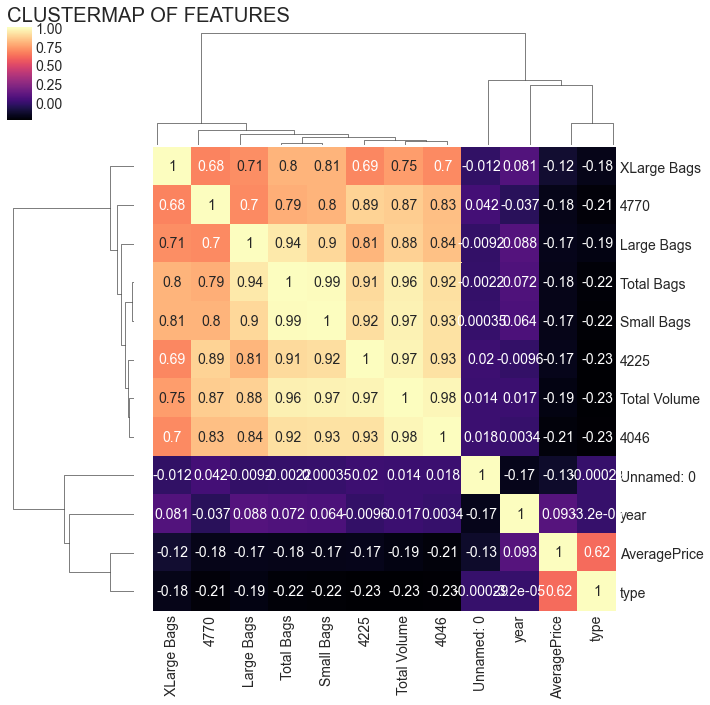

In [149]:
plt.figure(figsize=(14,8))
sns.clustermap(df.corr(),cmap='magma', annot=True, square=True,)
plt.title('CLUSTERMAP OF FEATURES', loc='left')

## DATA PROCESSING
---

In [152]:
X = df.drop(['type', 'region', 'Date'], axis=1) # I will drop Region since i will not use Natural Language Processing techniques
y = df['type']

In [153]:
#Normalizing the X features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

In [165]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

### FUNCTION FOR ROC PLOT
---

In [161]:
def plot_roc(X, y, estemeator,n_splits, lns = 100):
    #creating an instance of KFold
    kfold = StratifiedKFold(n_splits=n_splits,shuffle=False)
    #define estemator
    rf = estemeator
    #deifne figuresize
    plt.rcParams['figure.figsize'] = (10,5)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,lns)
    i = 1

    for train,test in kfold.split(X,y):
        #get prediction
        prediction = rf.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
        #get the true pos. rate, false positive rate and thresh 
        fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        #get the area under the curve
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        #plot the tpr and fpr
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i= i+1

    #plot the mean ROC
    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='gold',
    label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

    #setup the labels
    plt.legend(bbox_to_anchor=(1, 1))
    plt.title('ROC PLOT', fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)

## MACHINE LEARNING SECTION
---

### LOGISTIC REGRESSION
---

In [167]:
#get the accuracy of the model, this time i'll use the on train test split
log_reg.fit(X_train, y_train)
prediction = log_reg.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      2746
           1       0.92      0.96      0.94      2729

    accuracy                           0.94      5475
   macro avg       0.94      0.94      0.94      5475
weighted avg       0.94      0.94      0.94      5475



#### ROC PLOT WITH 5 FOLDS

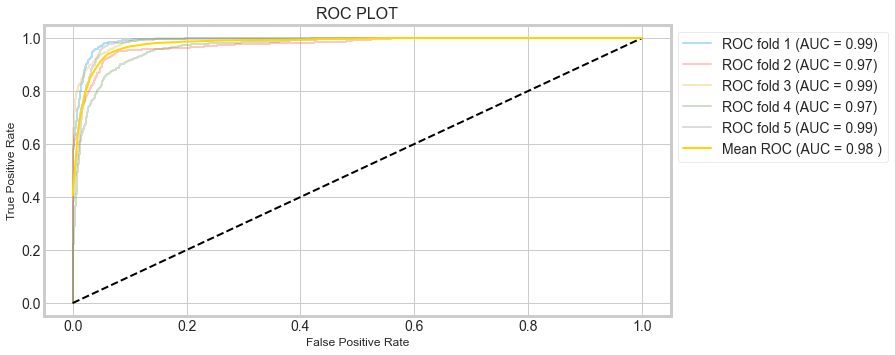

In [162]:
log_reg = LogisticRegression(penalty='l1', tol=0.0001)
#plot the roc, with 5 folds
plot_roc(X_scaled, y, estemeator=log_reg, n_splits=5,lns=100)

### RANDOM FOREST CLASSIFIER

In [170]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)

In [171]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2753
           1       0.99      1.00      0.99      2722

    accuracy                           0.99      5475
   macro avg       0.99      0.99      0.99      5475
weighted avg       0.99      0.99      0.99      5475



#### ROC PLOT OF RFC

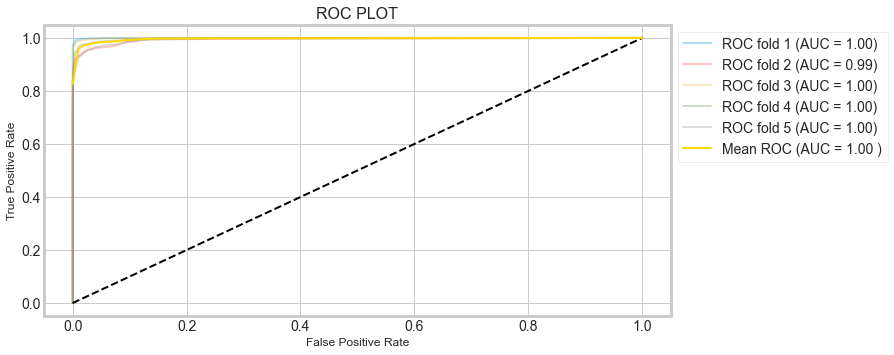

In [172]:
plot_roc(X_scaled, y, estemeator=rf, n_splits=5,lns=100)

### K-NEAREST NEIGHBORS CLASSIFIER

In [173]:
knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [174]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2715
           1       0.87      0.86      0.86      2760

    accuracy                           0.86      5475
   macro avg       0.86      0.86      0.86      5475
weighted avg       0.86      0.86      0.86      5475



#### ROC PLOT

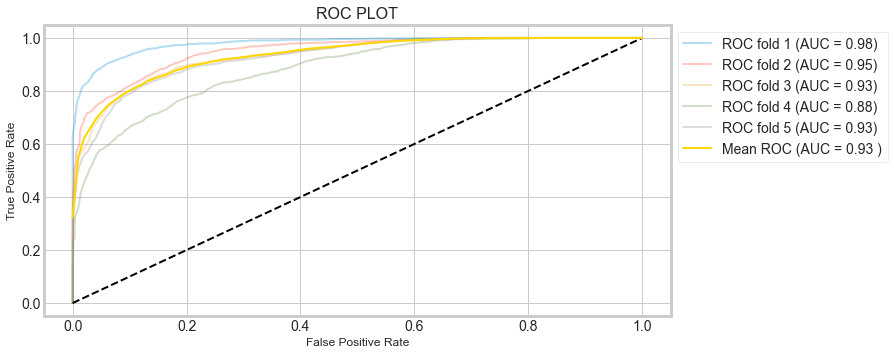

In [175]:
plot_roc(X_scaled, y, estemeator=knn, n_splits=5,lns=100)

## INSIGHTS
---
* Organic avocados are more expensive than the convential. 
* The price is increasing every year.
* At year 2017, Avocados at some other place are expensive.
* Random Forest Classifier performed way better than KNN and Logistic Regression.